# Intro.

New College 데이터셋에 대해서 실험
bigger_feature_size

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
from glob import glob 
import configparser
import scipy.io as sio

from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [3]:
# new college 데이터
nc_real_corr_list = [[1, 187], [2, 188], [5, 193], [7, 195], [8, 196], [9, 197], [10, 198], [11, 199], [12, 200], [13, 201], [14, 202], [15, 203], [16, 204], [18, 204], [19, 205], [20, 206], [21, 207], [22, 208], [23, 207], [23, 209], [24, 209], [25, 209], [26, 210], [27, 211], [28, 212], [29, 210], [29, 212], [29, 213], [30, 212], [30, 214], [31, 213], [31, 215], [32, 216], [33, 217], [34, 218], [49, 237], [50, 238], [53, 241], [69, 255], [70, 256], [71, 257], [72, 258], [73, 259], [74, 260], [75, 261], [76, 262], [77, 263], [78, 262], [78, 263], [78, 264], [79, 263], [79, 265], [79, 266], [80, 263], [80, 264], [80, 265], [80, 266], [80, 267], [80, 268], [80, 270], [81, 269], [81, 271], [82, 270], [82, 272], [83, 271], [84, 272], [85, 273], [86, 274], [87, 275], [88, 276], [89, 277], [90, 278], [91, 279], [108, 298], [109, 299], [110, 300], [111, 301], [112, 302], [113, 303], [114, 304], [115, 306], [157, 347], [158, 348], [161, 351], [162, 352], [163, 353], [164, 354], [165, 355], [166, 356], [167, 357], [168, 358], [168, 360], [169, 359], [169, 361], [169, 363], [170, 360], [170, 364], [171, 361], [171, 363], [172, 362], [172, 364], [173, 363], [174, 362], [174, 364], [175, 363], [398, 548], [398, 944], [405, 561], [406, 562], [407, 563], [408, 564], [408, 962], [409, 565], [409, 963], [410, 566], [411, 567], [412, 568], [413, 965], [414, 966], [415, 569], [431, 587], [432, 588], [433, 589], [434, 590], [435, 591], [436, 592], [437, 593], [438, 594], [442, 994], [444, 994], [445, 995], [499, 897], [518, 908], [519, 911], [520, 910], [520, 912], [521, 913], [522, 916], [523, 917], [524, 916], [524, 918], [525, 919], [545, 941], [546, 942], [547, 943], [548, 944], [549, 945], [550, 946], [551, 947], [551, 949], [552, 948], [552, 950], [553, 951], [560, 958], [561, 959], [561, 961], [562, 960], [564, 962], [565, 963], [566, 964], [603, 1001], [604, 1002], [605, 1003], [606, 1004], [607, 1005], [608, 1006], [609, 1007], [610, 1008], [611, 1009], [612, 1010], [652, 1050], [652, 1052], [653, 1051], [653, 1053], [654, 1052], [655, 1053], [656, 1054], [662, 1057], [662, 1058], [677, 1066], [762, 1158], [793, 1924], [795, 1120], [811, 1104], [815, 1100], [821, 1096], [822, 1095], [823, 1094], [850, 1069], [870, 1038], [870, 1039], [870, 1040], [870, 1041], [871, 1037], [871, 1038], [871, 1039], [871, 1040], [871, 1041], [1107, 1938], [1109, 1936], [1111, 1934], [1122, 1925], [1178, 1602], [1179, 1603], [1180, 1604], [1181, 1605], [1182, 1606], [1183, 1607], [1184, 1608], [1185, 1609], [1187, 1611], [1188, 1610], [1188, 1612], [1189, 1613], [1190, 1612], [1190, 1614], [1219, 1645], [1220, 1646], [1221, 1647], [1222, 1648], [1223, 1649], [1224, 1650], [1274, 1693], [1290, 1710], [1292, 1712], [1292, 1714], [1293, 1715], [1294, 1716], [1295, 1717], [1295, 1719], [1296, 1718], [1296, 1720], [1297, 1719], [1297, 1721], [1297, 1723], [1298, 1722], [1298, 1724], [1299, 1723], [1299, 1725], [1300, 1726], [1300, 1728], [1301, 1731], [1302, 1732], [1303, 1733], [1307, 1736], [1309, 1740]]

In [4]:
len(np.unique(nc_real_corr_list))

394

# Manual GT image set organization

In [5]:
# import shutil
# Manual_LC_dataset = np.unique(np.array(nc_real_corr_list).flatten())
# for idx in Manual_LC_dataset:
#     src = "/media/dongwonshin/Ubuntu Data/Datasets/FAB-MAP/Image Data/New College/images/%04d.jpg" % idx
#     dst = "/media/dongwonshin/Ubuntu Data/Datasets/FAB-MAP/Image Data/New College ManualLC/images/"
#     shutil.copy(src,dst)

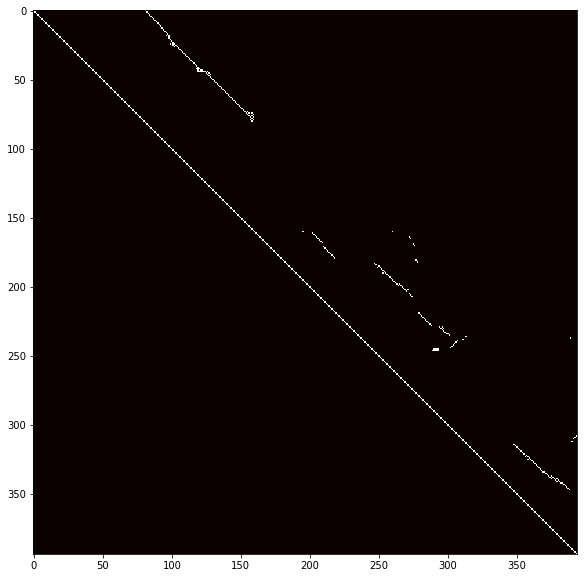

In [6]:
image_idx_order = np.unique(nc_real_corr_list)

GT_corr_mat = np.zeros((len(image_idx_order),len(image_idx_order)))

for a, i in enumerate(image_idx_order):
    for b, j in enumerate(image_idx_order):
        if i==j:
            GT_corr_mat[a,b] = 1
        if [i,j] in nc_real_corr_list:
            GT_corr_mat[a,b] = 1

plt.figure(figsize=(10,10))
plt.imshow(GT_corr_mat, cmap = 'hot')
plt.show()

In [7]:
def PrecisionRecallCurve(GT_corr_mat, esti_corr_mat):

    precision, recall, _ = precision_recall_curve(GT_corr_mat.flatten(), esti_corr_mat.flatten())
    average_precision = average_precision_score(GT_corr_mat.flatten(), esti_corr_mat.flatten())


    # Plot Precision-Recall curve
    plt.clf()
    plt.plot(recall, precision, lw=2, color='navy', label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision))
    plt.legend(loc="lower left")
    plt.show()
    
    return precision, recall
    
    
def theLatestResult(path_pattern):
    result_dirs = sorted(glob(path_pattern))
    the_latest_result_path = result_dirs[-1]
    print(the_latest_result_path)
    corr_mat_path = the_latest_result_path + '/corr_matrix.txt'
    param_cfg_path = the_latest_result_path + '/parameters.cfg'
    
    config = configparser.ConfigParser()
    config.read(param_cfg_path)
    print(dict(config.items('General')))
    
    
    return corr_mat_path, param_cfg_path

def theSpecificResult(path):
    corr_mat_path = path + '/corr_matrix.txt'
    param_cfg_path = path + '/parameters.cfg'
    
    config = configparser.ConfigParser()
    config.read(param_cfg_path)
    print(dict(config.items('General')))

    
    return corr_mat_path, param_cfg_path

# Proposed method

{'method': 'proposed_method', 'dataset': 'New College', 'network model': 'bigger_feature_size', 'scoring type': 'L1_NORM'}


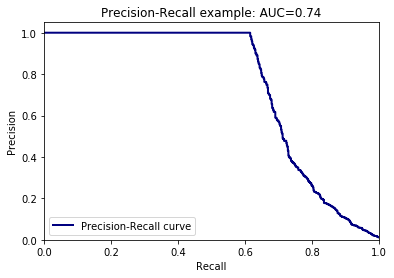

In [8]:
corr_mat, param_cfg = theSpecificResult('/home/dongwonshin/Desktop/DBoW2/build2/result/2017-08-23-16-50-49')
esti_corr_mat = np.loadtxt(corr_mat)
prop_result = PrecisionRecallCurve(GT_corr_mat, esti_corr_mat)

# SURF

{'method': 'SURF', 'dataset': 'New College', 'scoring type': 'L1_NORM', 'surf params': '{300,4,2}'}


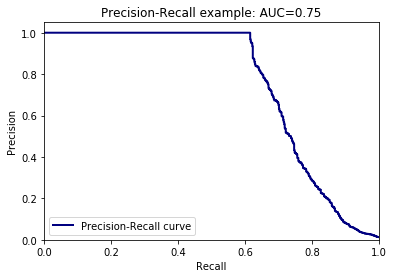

In [9]:
corr_mat, param_cfg = theSpecificResult('/home/dongwonshin/Desktop/DBoW2/build2/result/2017-08-23-16-42-31')
esti_corr_mat = np.loadtxt(corr_mat)
surf_result = PrecisionRecallCurve(GT_corr_mat, esti_corr_mat)

# SURF (EXTENDED_SURF=true)

{'method': 'SURF', 'dataset': 'New College', 'test data': 'online_survey', 'scoring type': 'L1_NORM', 'surf params': '{300,4,2}'}


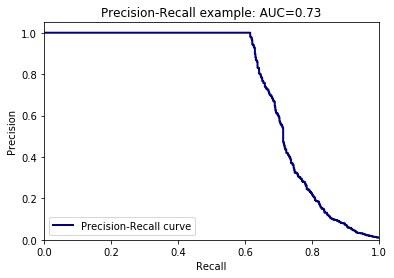

In [10]:
corr_mat, param_cfg = theSpecificResult('/home/dongwonshin/Desktop/DBoW2/build2/result/2017-08-24-22-44-56')
esti_corr_mat = np.loadtxt(corr_mat)
surf_result = PrecisionRecallCurve(GT_corr_mat, esti_corr_mat)

# ORB

/home/dongwonshin/Desktop/DBow3/build2/result/2017-08-23-17-21-44
{'method': 'orb', 'dataset': 'New College', 'scoring type': 'L1_NORM'}


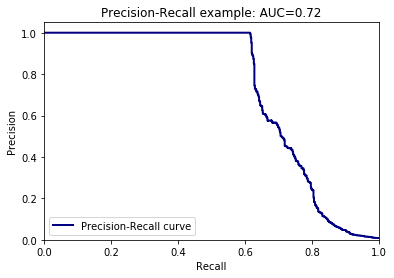

In [11]:
corr_mat, param_cfg = theLatestResult('/home/dongwonshin/Desktop/DBow3/build2/result/2017-08-23-17-21-44')
esti_corr_mat = np.loadtxt(corr_mat)
orb_result = PrecisionRecallCurve(GT_corr_mat, esti_corr_mat)

# BRISK

/home/dongwonshin/Desktop/DBow3/build2/result/2017-08-23-17-22-33
{'method': 'brisk', 'dataset': 'New College', 'scoring type': 'L1_NORM'}


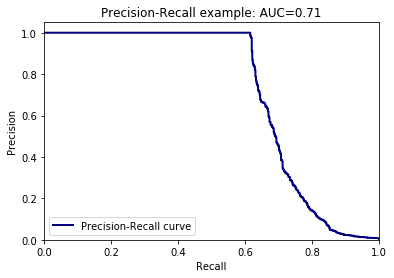

In [12]:
corr_mat, param_cfg = theLatestResult('/home/dongwonshin/Desktop/DBow3/build2/result/2017-08-23-17-22-33')
esti_corr_mat = np.loadtxt(corr_mat)
brisk_result = PrecisionRecallCurve(GT_corr_mat, esti_corr_mat)

# Fisher Vector

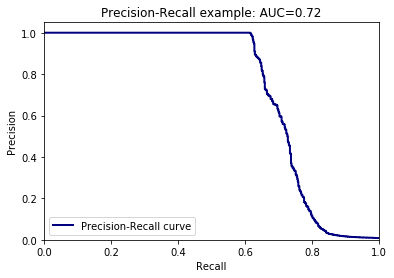

In [13]:
# new college, vlfeat, FV 방법
mat_contents = sio.loadmat('vlfeat_results/20170825/vlad_NC_corr_matrix.mat')
corr_matrix = mat_contents['corr_matrix']
fv_result = PrecisionRecallCurve(GT_corr_mat, corr_matrix)

# VLAD

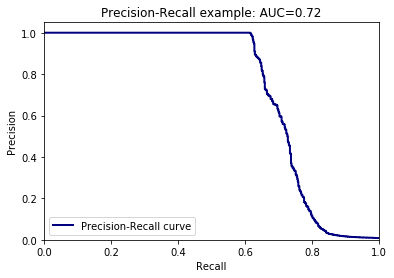

In [14]:
# new college, vlfeat, VLAD 방법
mat_contents = sio.loadmat('vlfeat_results/20170825/vlad_NC_corr_matrix.mat')
corr_matrix = mat_contents['corr_matrix']
vlad_result = PrecisionRecallCurve(GT_corr_mat, corr_matrix)

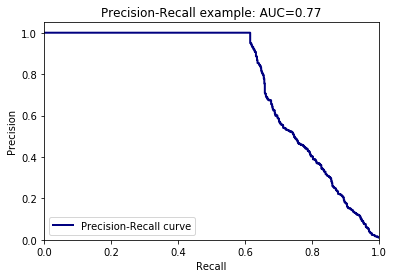

In [17]:
# city centre, vlfeat, bovw-SIFT 방법
mat_contents = sio.loadmat('vlfeat_results/20170825/bovw_NC_corr_matrix.mat')
corr_matrix = mat_contents['corr_matrix']
sift_result = PrecisionRecallCurve(GT_corr_mat, corr_matrix)

# 최종 결과

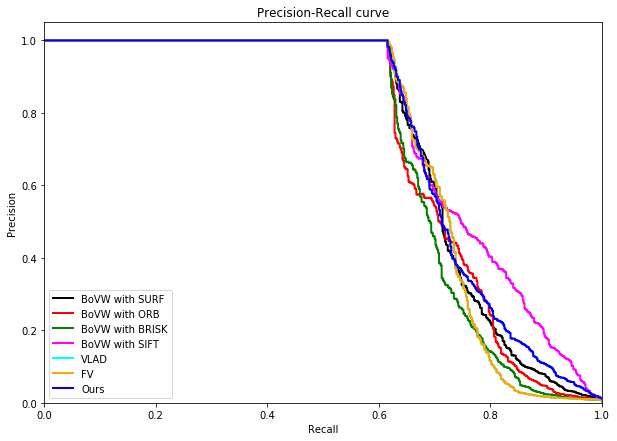

In [18]:
# Plot Precision-Recall curve
plt.figure(figsize=(10,7))
plt.clf()
plt.plot(surf_result[1], surf_result[0], lw=2, color='black', label='BoVW with SURF')
plt.plot(orb_result[1], orb_result[0], lw=2, color='red', label='BoVW with ORB')
plt.plot(brisk_result[1], brisk_result[0], lw=2, color='green', label='BoVW with BRISK')
plt.plot(sift_result[1], sift_result[0], lw=2, color='magenta', label='BoVW with SIFT')
plt.plot(vlad_result[1], vlad_result[0], lw=2, color='cyan', label='VLAD')
plt.plot(fv_result[1], fv_result[0], lw=2, color='orange', label='FV')
plt.plot(prop_result[1], prop_result[0], lw=2, color='blue', label='Ours')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()